<a href="https://colab.research.google.com/github/ngohuy1811/AIO-Module-5/blob/main/Project_vanishing_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import FashionMNIST

In [ ]:
device = torch.device('cuda :0' if torch.cuda.is_available() else 'cpu')

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

SEED = 42
set_seed(SEED)

In [ ]:
#download Fashion MNIST.
train_dataset = FashionMNIST('./data', train = True, download=True, transform=transforms.ToTensor())
test_dataset = FashionMNIST('./data', train = False, download=True, transform=transforms.ToTensor())


In [ ]:
#Split test and train dataset
batch_size = 64
train_ratio = 0.9
train_size = int(len(train_dataset)*train_ratio)
val_size = len(train_dataset) - train_size

train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_subset, batch_size = batch_size, shuffle=True)

val_loader = DataLoader(val_subset, batch_size = batch_size, shuffle=False)

test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle=False)

print(f"Train size:{len(train_subset)}")
print(f"Validation size:{len(val_subset)}")
print(f"Test size:{len(test_dataset)}")

Train size:54000
Validation size:6000
Test size:10000


In [ ]:
class MLP(nn.Module):
    def __init__(self , input_dims , hidden_dims , output_dims ):
        super (MLP , self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.layer6 = nn.Linear(hidden_dims, hidden_dims)
        self.layer7 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Sigmoid()(x)
        x = self.layer3(x)
        x = nn.Sigmoid()(x)
        x = self.layer4(x)
        x = nn.Sigmoid()(x)
        x = self.layer5(x)
        x = nn.Sigmoid()(x)
        x = self.layer6(x)
        x = nn.Sigmoid()(x)
        x = self.layer7(x)
        x = nn.Sigmoid()(x)
        out = self.output(x)
        return out

input_dims = 784
hidden_dims = 128
output_dims = 10
lr = 1e-2

model = MLP(input_dims = input_dims, hidden_dims = hidden_dims, output_dims = output_dims).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [ ]:
#Model training

epochs = 100
train_loss_lst = []
train_acc_lst = []
val_loss_lst = []
val_acc_lst = []

for epoch in range(epochs):
    train_loss = 0.0
    train_acc = 0.0
    count = 0
    model.train()
    for X_train , y_train in train_loader:
        X_train , y_train = X_train.to(device), y_train.to(device)
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += (torch.argmax(outputs, 1)==y_train ).sum().item()
        count += len(y_train)

    train_loss /= len(train_loader)
    train_loss_lst.append(train_loss)
    train_acc /= count
    train_acc_lst.append(train_acc)

    val_loss = 0.0
    val_acc = 0.0
    count = 0
    model.eval()
    with torch.no_grad():
        for X_val , y_val in val_loader:
            X_val , y_val = X_val.to(device), y_val.to(device)
            outputs = model(X_val)
            loss = criterion(outputs, y_val)
            val_loss += loss.item()
            val_acc += (torch.argmax(outputs, 1)==y_val).sum().item()
            count += len(y_val)

    val_loss /= len(val_loader)
    val_loss_lst.append(val_loss)
    val_acc /= count
    val_acc_lst.append(val_acc)

    print(f"EPOCH {epoch+1}/{epochs}, Train_Loss:{train_loss:.4f}, Train_Acc:{train_acc:.4f}, Validation Loss: {val_loss:.4f}, Val_Acc:{val_acc:.4f}")


EPOCH 1/100, Train_Loss:2.3045, Train_Acc:0.1006, Validation Loss: 2.3051, Val_Acc:0.0952
EPOCH 2/100, Train_Loss:2.3037, Train_Acc:0.1004, Validation Loss: 2.3036, Val_Acc:0.0997
EPOCH 3/100, Train_Loss:2.3039, Train_Acc:0.0972, Validation Loss: 2.3037, Val_Acc:0.0962
EPOCH 4/100, Train_Loss:2.3040, Train_Acc:0.0985, Validation Loss: 2.3041, Val_Acc:0.0967
EPOCH 5/100, Train_Loss:2.3038, Train_Acc:0.1020, Validation Loss: 2.3037, Val_Acc:0.0967
EPOCH 6/100, Train_Loss:2.3040, Train_Acc:0.0973, Validation Loss: 2.3040, Val_Acc:0.1025
EPOCH 7/100, Train_Loss:2.3038, Train_Acc:0.0994, Validation Loss: 2.3049, Val_Acc:0.0962
EPOCH 8/100, Train_Loss:2.3039, Train_Acc:0.0986, Validation Loss: 2.3028, Val_Acc:0.0972
EPOCH 9/100, Train_Loss:2.3039, Train_Acc:0.1001, Validation Loss: 2.3045, Val_Acc:0.0962
EPOCH 10/100, Train_Loss:2.3040, Train_Acc:0.0978, Validation Loss: 2.3036, Val_Acc:0.0965
EPOCH 11/100, Train_Loss:2.3040, Train_Acc:0.0977, Validation Loss: 2.3027, Val_Acc:0.0997
EPOCH 12

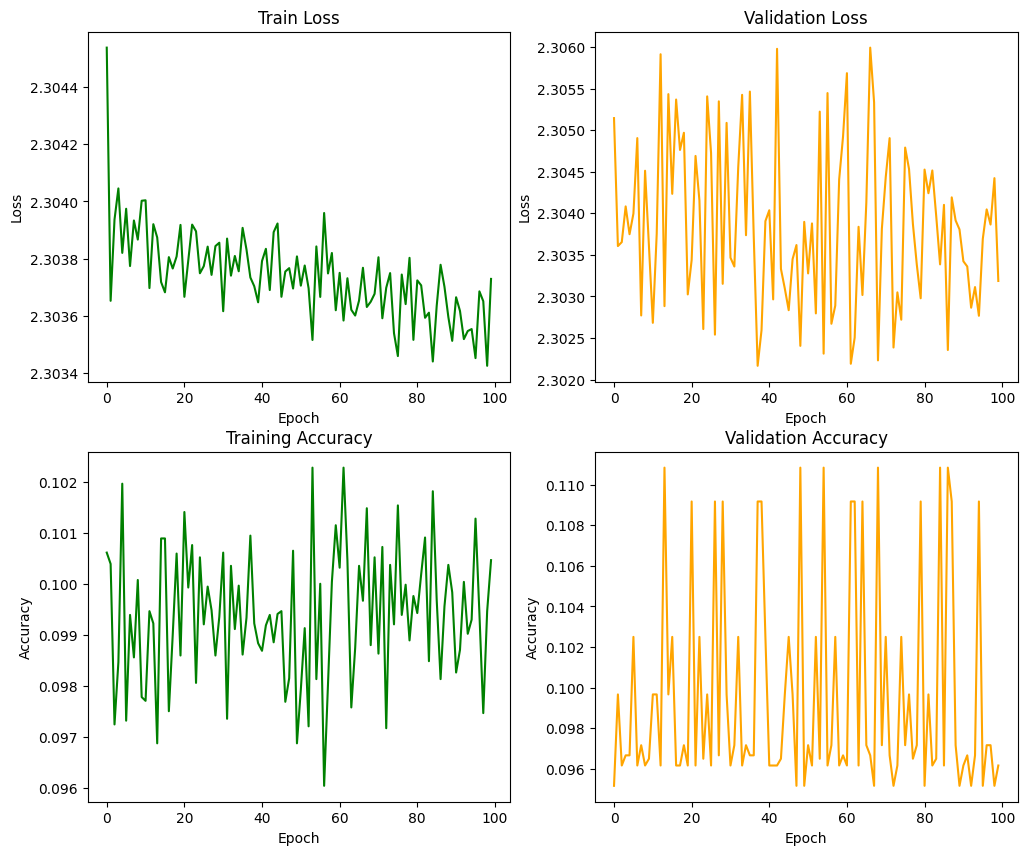

In [ ]:
fig , ax = plt.subplots(2 , 2 , figsize =(12 , 10))
ax[0,0].plot(train_loss_lst , color ='green')
ax[0,0].set( xlabel ='Epoch', ylabel ='Loss')
ax[0,0].set_title('Train Loss')

ax[0,1].plot(val_loss_lst , color ='orange')
ax[0,1].set( xlabel ='Epoch', ylabel ='Loss')
ax[0,1].set_title('Validation Loss')

ax[1,0].plot(train_acc_lst , color ='green')
ax[1,0].set( xlabel ='Epoch', ylabel ='Accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_acc_lst , color ='orange')
ax[1,1].set( xlabel ='Epoch', ylabel ='Accuracy')
ax[1,1].set_title('Validation Accuracy')

plt.show()

In [ ]:
test_target = []
test_predict = []
model.eval()
with torch.no_grad():
    for X_test , y_test in test_loader:
        X_test , y_test = X_test.to(device), y_test.to(device)
        outputs = model(X_test)

        test_predict.append(outputs.cpu())
        test_target.append(y_test.cpu())

    test_predict = torch.cat(test_predict)
    test_target = torch.cat(test_target)
    test_acc = (torch.argmax(test_predict, 1)==test_target).sum().item() / len(test_target)

    print('Evaluation on test set: ')
    print(f"Accuracy: {test_acc}")


Evaluation on test set: 
Accuracy: 0.1


# **Weight Increasing:**

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import FashionMNIST

In [ ]:
device = torch.device('cuda :0' if torch.cuda.is_available() else 'cpu')

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

SEED = 42
set_seed(SEED)

In [ ]:
#download Fashion MNIST.
train_dataset = FashionMNIST('./data', train = True, download=True, transform=transforms.ToTensor())
test_dataset = FashionMNIST('./data', train = False, download=True, transform=transforms.ToTensor())

In [ ]:
#Split test and train dataset
batch_size = 64
train_ratio = 0.9
train_size = int(len(train_dataset)*train_ratio)
val_size = len(train_dataset) - train_size

train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_subset, batch_size = batch_size, shuffle=True)

val_loader = DataLoader(val_subset, batch_size = batch_size, shuffle=False)

test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle=False)

print(f"Train size:{len(train_subset)}")
print(f"Validation size:{len(val_subset)}")
print(f"Test size:{len(test_dataset)}")

Train size:54000
Validation size:6000
Test size:10000


In [ ]:
class MLP(nn.Module):
    def __init__(self , input_dims , hidden_dims , output_dims ):
        super (MLP , self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.layer6 = nn.Linear(hidden_dims, hidden_dims)
        self.layer7 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)

        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.normal_(module.weight, mean=0.0, std= 1.0)
                nn.init.constant_(module.bias, 0.0)

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Sigmoid()(x)
        x = self.layer3(x)
        x = nn.Sigmoid()(x)
        x = self.layer4(x)
        x = nn.Sigmoid()(x)
        x = self.layer5(x)
        x = nn.Sigmoid()(x)
        x = self.layer6(x)
        x = nn.Sigmoid()(x)
        x = self.layer7(x)
        x = nn.Sigmoid()(x)
        out = self.output(x)
        return out

input_dims = 784
hidden_dims = 128
output_dims = 10
lr = 1e-2

model = MLP(input_dims = input_dims, hidden_dims = hidden_dims, output_dims = output_dims).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [ ]:
#Model training

epochs = 100
train_loss_lst = []
train_acc_lst = []
val_loss_lst = []
val_acc_lst = []

for epoch in range(epochs):
    train_loss = 0.0
    train_acc = 0.0
    count = 0
    model.train()
    for X_train , y_train in train_loader:
        X_train , y_train = X_train.to(device), y_train.to(device)
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += (torch.argmax(outputs, 1)==y_train ).sum().item()
        count += len(y_train)

    train_loss /= len(train_loader)
    train_loss_lst.append(train_loss)
    train_acc /= count
    train_acc_lst.append(train_acc)

    val_loss = 0.0
    val_acc = 0.0
    count = 0
    model.eval()
    with torch.no_grad():
        for X_val , y_val in val_loader:
            X_val , y_val = X_val.to(device), y_val.to(device)
            outputs = model(X_val)
            loss = criterion(outputs, y_val)
            val_loss += loss.item()
            val_acc += (torch.argmax(outputs, 1)==y_val).sum().item()
            count += len(y_val)

    val_loss /= len(val_loader)
    val_loss_lst.append(val_loss)
    val_acc /= count
    val_acc_lst.append(val_acc)

    print(f"EPOCH {epoch+1}/{epochs}, Train_Loss:{train_loss:.4f}, Train_Acc:{train_acc:.4f}, Validation Loss: {val_loss:.4f}, Val_Acc:{val_acc:.4f}")

EPOCH 1/100, Train_Loss:1.7352, Train_Acc:0.4505, Validation Loss: 1.2657, Val_Acc:0.5535
EPOCH 2/100, Train_Loss:1.1214, Train_Acc:0.5965, Validation Loss: 1.0754, Val_Acc:0.6138
EPOCH 3/100, Train_Loss:0.9869, Train_Acc:0.6442, Validation Loss: 0.9772, Val_Acc:0.6523
EPOCH 4/100, Train_Loss:0.9110, Train_Acc:0.6707, Validation Loss: 0.9148, Val_Acc:0.6725
EPOCH 5/100, Train_Loss:0.8596, Train_Acc:0.6889, Validation Loss: 0.8746, Val_Acc:0.6853
EPOCH 6/100, Train_Loss:0.8220, Train_Acc:0.7014, Validation Loss: 0.8433, Val_Acc:0.6992
EPOCH 7/100, Train_Loss:0.7914, Train_Acc:0.7134, Validation Loss: 0.8217, Val_Acc:0.7080
EPOCH 8/100, Train_Loss:0.7676, Train_Acc:0.7213, Validation Loss: 0.8045, Val_Acc:0.7128
EPOCH 9/100, Train_Loss:0.7472, Train_Acc:0.7282, Validation Loss: 0.7872, Val_Acc:0.7168
EPOCH 10/100, Train_Loss:0.7301, Train_Acc:0.7339, Validation Loss: 0.7740, Val_Acc:0.7247
EPOCH 11/100, Train_Loss:0.7153, Train_Acc:0.7385, Validation Loss: 0.7614, Val_Acc:0.7280
EPOCH 12

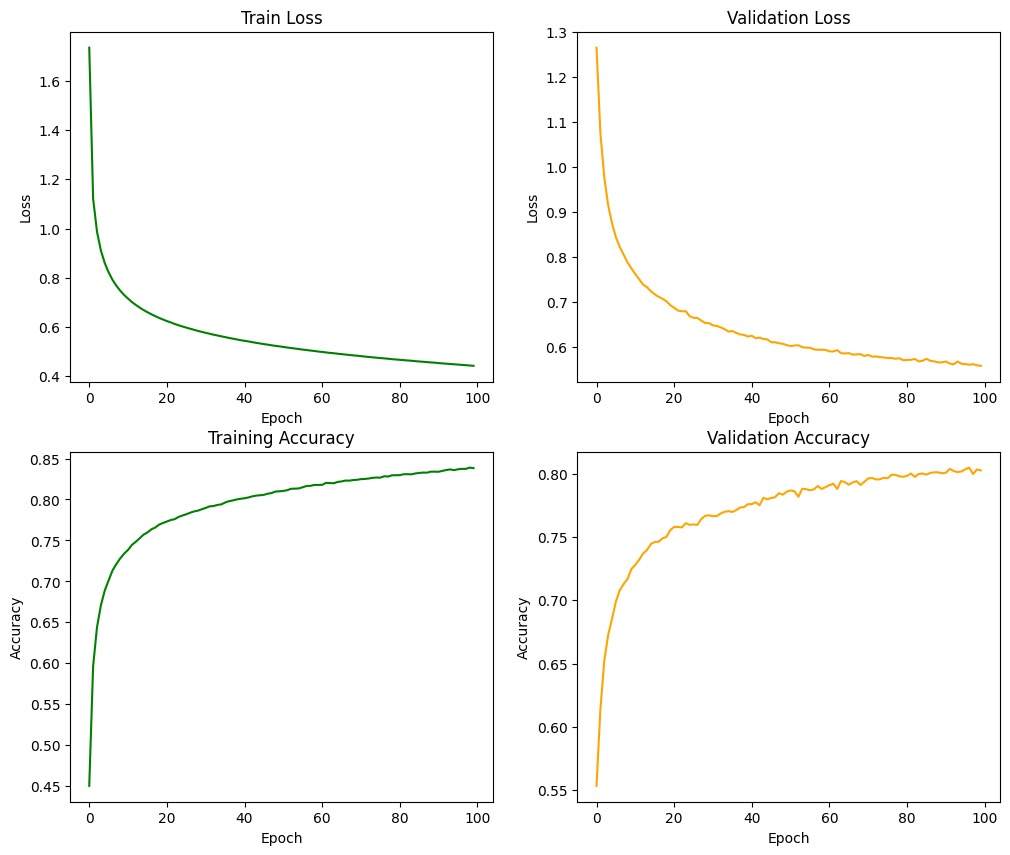

In [ ]:
fig , ax = plt.subplots(2 , 2 , figsize =(12 , 10))
ax[0,0].plot(train_loss_lst , color ='green')
ax[0,0].set( xlabel ='Epoch', ylabel ='Loss')
ax[0,0].set_title('Train Loss')

ax[0,1].plot(val_loss_lst , color ='orange')
ax[0,1].set( xlabel ='Epoch', ylabel ='Loss')
ax[0,1].set_title('Validation Loss')

ax[1,0].plot(train_acc_lst , color ='green')
ax[1,0].set( xlabel ='Epoch', ylabel ='Accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_acc_lst , color ='orange')
ax[1,1].set( xlabel ='Epoch', ylabel ='Accuracy')
ax[1,1].set_title('Validation Accuracy')

plt.show()

In [ ]:
test_target = []
test_predict = []
model.eval()
with torch.no_grad():
    for X_test , y_test in test_loader:
        X_test , y_test = X_test.to(device), y_test.to(device)
        outputs = model(X_test)

        test_predict.append(outputs.cpu())
        test_target.append(y_test.cpu())

    test_predict = torch.cat(test_predict)
    test_target = torch.cat(test_target)
    test_acc = (torch.argmax(test_predict, 1)==test_target).sum().item() / len(test_target)

    print('Evaluation on test set: ')
    print(f"Accuracy: {test_acc}")

Evaluation on test set: 
Accuracy: 0.797


# **Better Activation**

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import FashionMNIST

In [ ]:
device = torch.device('cuda :0' if torch.cuda.is_available() else 'cpu')

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

SEED = 42
set_seed(SEED)

In [ ]:
#download Fashion MNIST.
train_dataset = FashionMNIST('./data', train = True, download=True, transform=transforms.ToTensor())
test_dataset = FashionMNIST('./data', train = False, download=True, transform=transforms.ToTensor())

In [ ]:
#Split test and train dataset
batch_size = 64
train_ratio = 0.9
train_size = int(len(train_dataset)*train_ratio)
val_size = len(train_dataset) - train_size

train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_subset, batch_size = batch_size, shuffle=True)

val_loader = DataLoader(val_subset, batch_size = batch_size, shuffle=False)

test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle=False)

print(f"Train size:{len(train_subset)}")
print(f"Validation size:{len(val_subset)}")
print(f"Test size:{len(test_dataset)}")

Train size:54000
Validation size:6000
Test size:10000


In [ ]:
class MLP(nn.Module):
    def __init__(self , input_dims , hidden_dims , output_dims ):
        super (MLP , self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.layer6 = nn.Linear(hidden_dims, hidden_dims)
        self.layer7 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)

        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std= 0.05)
                nn.init.constant_(m.bias, 0.0)

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = nn.ReLU()(x)
        x = self.layer2(x)
        x = nn.ReLU()(x)
        x = self.layer3(x)
        x = nn.ReLU()(x)
        x = self.layer4(x)
        x = nn.ReLU()(x)
        x = self.layer5(x)
        x = nn.ReLU()(x)
        x = self.layer6(x)
        x = nn.ReLU()(x)
        x = self.layer7(x)
        x = nn.ReLU()(x)
        out = self.output(x)
        return out

input_dims = 784
hidden_dims = 128
output_dims = 10
lr = 1e-2

model = MLP(input_dims = input_dims, hidden_dims = hidden_dims, output_dims = output_dims).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [ ]:
#Model training

epochs = 100
train_loss_lst = []
train_acc_lst = []
val_loss_lst = []
val_acc_lst = []

for epoch in range(epochs):
    train_loss = 0.0
    train_acc = 0.0
    count = 0
    model.train()
    for X_train , y_train in train_loader:
        X_train , y_train = X_train.to(device), y_train.to(device)
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += (torch.argmax(outputs, 1)==y_train ).sum().item()
        count += len(y_train)

    train_loss /= len(train_loader)
    train_loss_lst.append(train_loss)
    train_acc /= count
    train_acc_lst.append(train_acc)

    val_loss = 0.0
    val_acc = 0.0
    count = 0
    model.eval()
    with torch.no_grad():
        for X_val , y_val in val_loader:
            X_val , y_val = X_val.to(device), y_val.to(device)
            outputs = model(X_val)
            loss = criterion(outputs, y_val)
            val_loss += loss.item()
            val_acc += (torch.argmax(outputs, 1)==y_val).sum().item()
            count += len(y_val)

    val_loss /= len(val_loader)
    val_loss_lst.append(val_loss)
    val_acc /= count
    val_acc_lst.append(val_acc)

    print(f"EPOCH {epoch+1}/{epochs}, Train_Loss:{train_loss:.4f}, Train_Acc:{train_acc:.4f}, Validation Loss: {val_loss:.4f}, Val_Acc:{val_acc:.4f}")

EPOCH 1/100, Train_Loss:2.3021, Train_Acc:0.1247, Validation Loss: 2.3018, Val_Acc:0.1190
EPOCH 2/100, Train_Loss:2.3011, Train_Acc:0.1513, Validation Loss: 2.3007, Val_Acc:0.1760
EPOCH 3/100, Train_Loss:2.2992, Train_Acc:0.2003, Validation Loss: 2.2975, Val_Acc:0.1717
EPOCH 4/100, Train_Loss:2.2916, Train_Acc:0.2808, Validation Loss: 2.2808, Val_Acc:0.2760
EPOCH 5/100, Train_Loss:2.1062, Train_Acc:0.2483, Validation Loss: 1.5210, Val_Acc:0.2945
EPOCH 6/100, Train_Loss:1.2067, Train_Acc:0.4952, Validation Loss: 1.0687, Val_Acc:0.5425
EPOCH 7/100, Train_Loss:1.0061, Train_Acc:0.6002, Validation Loss: 0.9452, Val_Acc:0.6322
EPOCH 8/100, Train_Loss:0.9029, Train_Acc:0.6548, Validation Loss: 0.8213, Val_Acc:0.7060
EPOCH 9/100, Train_Loss:0.8088, Train_Acc:0.6973, Validation Loss: 0.7893, Val_Acc:0.7238
EPOCH 10/100, Train_Loss:0.7063, Train_Acc:0.7380, Validation Loss: 0.6510, Val_Acc:0.7682
EPOCH 11/100, Train_Loss:0.6400, Train_Acc:0.7652, Validation Loss: 0.6025, Val_Acc:0.7925
EPOCH 12

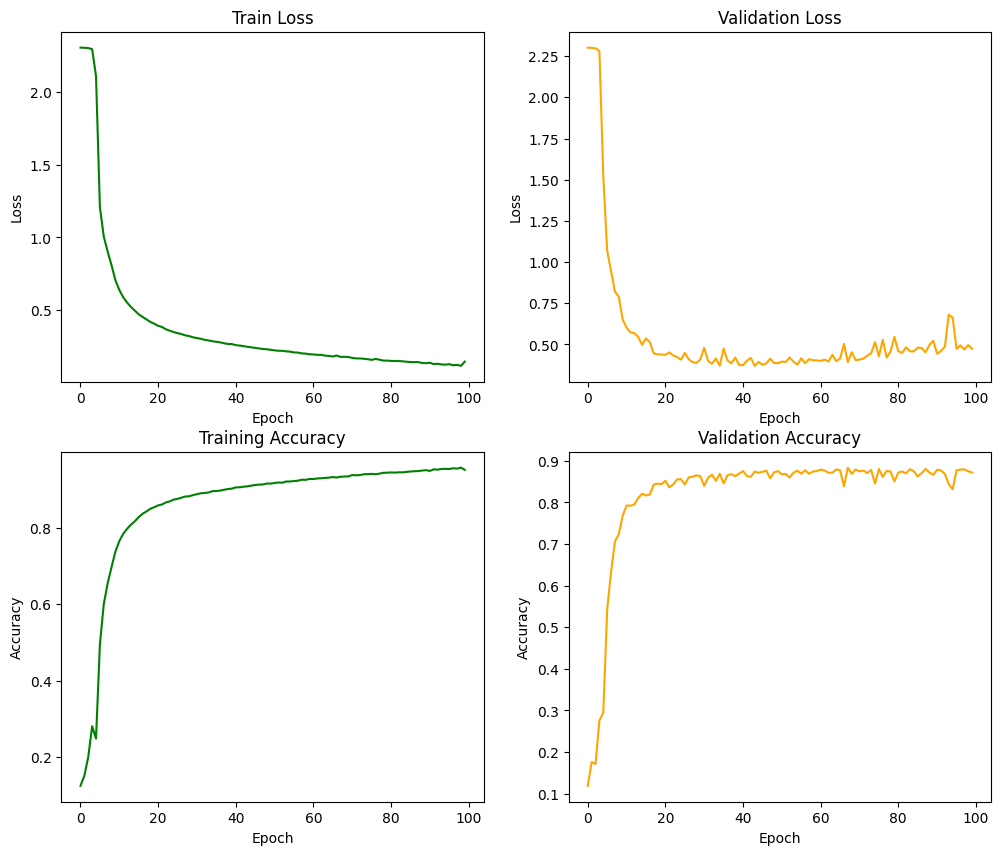

In [ ]:
fig , ax = plt.subplots(2 , 2 , figsize =(12 , 10))
ax[0,0].plot(train_loss_lst , color ='green')
ax[0,0].set( xlabel ='Epoch', ylabel ='Loss')
ax[0,0].set_title('Train Loss')

ax[0,1].plot(val_loss_lst , color ='orange')
ax[0,1].set( xlabel ='Epoch', ylabel ='Loss')
ax[0,1].set_title('Validation Loss')

ax[1,0].plot(train_acc_lst , color ='green')
ax[1,0].set( xlabel ='Epoch', ylabel ='Accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_acc_lst , color ='orange')
ax[1,1].set( xlabel ='Epoch', ylabel ='Accuracy')
ax[1,1].set_title('Validation Accuracy')

plt.show()

In [ ]:
test_target = []
test_predict = []
model.eval()
with torch.no_grad():
    for X_test , y_test in test_loader:
        X_test , y_test = X_test.to(device), y_test.to(device)
        outputs = model(X_test)

        test_predict.append(outputs.cpu())
        test_target.append(y_test.cpu())

    test_predict = torch.cat(test_predict)
    test_target = torch.cat(test_target)
    test_acc = (torch.argmax(test_predict, 1)==test_target).sum().item() / len(test_target)

    print('Evaluation on test set: ')
    print(f"Accuracy: {test_acc}")

Evaluation on test set: 
Accuracy: 0.8716


# **Better Optimizer**

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import FashionMNIST

In [ ]:
device = torch.device('cuda :0' if torch.cuda.is_available() else 'cpu')

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

SEED = 42
set_seed(SEED)

In [ ]:
#download Fashion MNIST.
train_dataset = FashionMNIST('./data', train = True, download=True, transform=transforms.ToTensor())
test_dataset = FashionMNIST('./data', train = False, download=True, transform=transforms.ToTensor())

In [ ]:
#Split test and train dataset
batch_size = 64
train_ratio = 0.9
train_size = int(len(train_dataset)*train_ratio)
val_size = len(train_dataset) - train_size

train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_subset, batch_size = batch_size, shuffle=True)

val_loader = DataLoader(val_subset, batch_size = batch_size, shuffle=False)

test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle=False)

print(f"Train size:{len(train_subset)}")
print(f"Validation size:{len(val_subset)}")
print(f"Test size:{len(test_dataset)}")

Train size:54000
Validation size:6000
Test size:10000


In [ ]:
class MLP(nn.Module):
    def __init__(self , input_dims , hidden_dims , output_dims ):
        super (MLP , self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.layer6 = nn.Linear(hidden_dims, hidden_dims)
        self.layer7 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)


    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Sigmoid()(x)
        x = self.layer3(x)
        x = nn.Sigmoid()(x)
        x = self.layer4(x)
        x = nn.Sigmoid()(x)
        x = self.layer5(x)
        x = nn.Sigmoid()(x)
        x = self.layer6(x)
        x = nn.Sigmoid()(x)
        x = self.layer7(x)
        x = nn.Sigmoid()(x)
        out = self.output(x)
        return out

input_dims = 784
hidden_dims = 128
output_dims = 10
lr = 1e-3

model = MLP(input_dims = input_dims, hidden_dims = hidden_dims, output_dims = output_dims).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
#Model training

epochs = 100
train_loss_lst = []
train_acc_lst = []
val_loss_lst = []
val_acc_lst = []

for epoch in range(epochs):
    train_loss = 0.0
    train_acc = 0.0
    count = 0
    model.train()
    for X_train , y_train in train_loader:
        X_train , y_train = X_train.to(device), y_train.to(device)
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += (torch.argmax(outputs, 1)==y_train ).sum().item()
        count += len(y_train)

    train_loss /= len(train_loader)
    train_loss_lst.append(train_loss)
    train_acc /= count
    train_acc_lst.append(train_acc)

    val_loss = 0.0
    val_acc = 0.0
    count = 0
    model.eval()
    with torch.no_grad():
        for X_val , y_val in val_loader:
            X_val , y_val = X_val.to(device), y_val.to(device)
            outputs = model(X_val)
            loss = criterion(outputs, y_val)
            val_loss += loss.item()
            val_acc += (torch.argmax(outputs, 1)==y_val).sum().item()
            count += len(y_val)

    val_loss /= len(val_loader)
    val_loss_lst.append(val_loss)
    val_acc /= count
    val_acc_lst.append(val_acc)

    print(f"EPOCH {epoch+1}/{epochs}, Train_Loss:{train_loss:.4f}, Train_Acc:{train_acc:.4f}, Validation Loss: {val_loss:.4f}, Val_Acc:{val_acc:.4f}")


EPOCH 1/100, Train_Loss:1.8042, Train_Acc:0.1876, Validation Loss: 1.6992, Val_Acc:0.1920
EPOCH 2/100, Train_Loss:1.6025, Train_Acc:0.2491, Validation Loss: 1.2821, Val_Acc:0.4272
EPOCH 3/100, Train_Loss:0.9326, Train_Acc:0.5834, Validation Loss: 0.7833, Val_Acc:0.7002
EPOCH 4/100, Train_Loss:0.7044, Train_Acc:0.7121, Validation Loss: 0.7136, Val_Acc:0.7250
EPOCH 5/100, Train_Loss:0.6194, Train_Acc:0.7736, Validation Loss: 0.6092, Val_Acc:0.7973
EPOCH 6/100, Train_Loss:0.5606, Train_Acc:0.8102, Validation Loss: 0.5746, Val_Acc:0.8140
EPOCH 7/100, Train_Loss:0.5262, Train_Acc:0.8263, Validation Loss: 0.5980, Val_Acc:0.8012
EPOCH 8/100, Train_Loss:0.5043, Train_Acc:0.8357, Validation Loss: 0.5189, Val_Acc:0.8360
EPOCH 9/100, Train_Loss:0.4856, Train_Acc:0.8438, Validation Loss: 0.5303, Val_Acc:0.8358
EPOCH 10/100, Train_Loss:0.4709, Train_Acc:0.8496, Validation Loss: 0.5290, Val_Acc:0.8388
EPOCH 11/100, Train_Loss:0.4621, Train_Acc:0.8537, Validation Loss: 0.4953, Val_Acc:0.8460
EPOCH 12

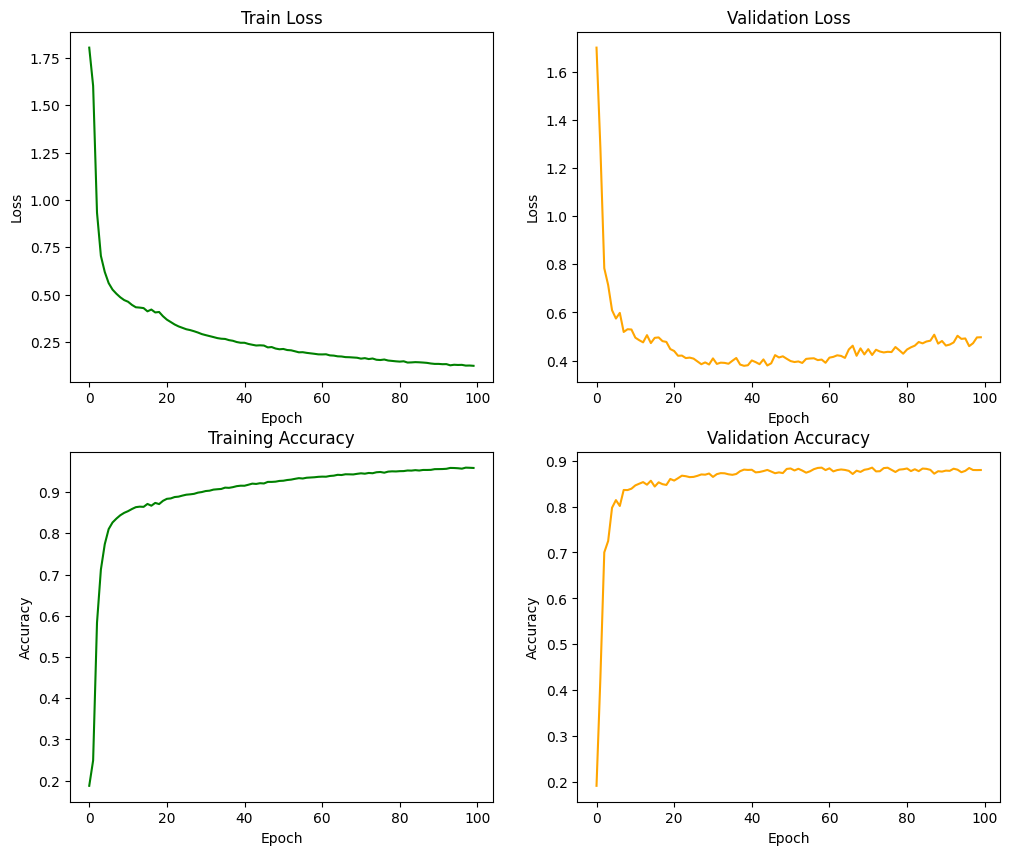

In [ ]:
fig , ax = plt.subplots(2 , 2 , figsize =(12 , 10))
ax[0,0].plot(train_loss_lst , color ='green')
ax[0,0].set( xlabel ='Epoch', ylabel ='Loss')
ax[0,0].set_title('Train Loss')

ax[0,1].plot(val_loss_lst , color ='orange')
ax[0,1].set( xlabel ='Epoch', ylabel ='Loss')
ax[0,1].set_title('Validation Loss')

ax[1,0].plot(train_acc_lst , color ='green')
ax[1,0].set( xlabel ='Epoch', ylabel ='Accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_acc_lst , color ='orange')
ax[1,1].set( xlabel ='Epoch', ylabel ='Accuracy')
ax[1,1].set_title('Validation Accuracy')

plt.show()

In [ ]:
test_target = []
test_predict = []
model.eval()
with torch.no_grad():
    for X_test , y_test in test_loader:
        X_test , y_test = X_test.to(device), y_test.to(device)
        outputs = model(X_test)

        test_predict.append(outputs.cpu())
        test_target.append(y_test.cpu())

    test_predict = torch.cat(test_predict)
    test_target = torch.cat(test_target)
    test_acc = (torch.argmax(test_predict, 1)==test_target).sum().item() / len(test_target)

    print('Evaluation on test set: ')
    print(f"Accuracy: {test_acc}")


Evaluation on test set: 
Accuracy: 0.8761


# **Normalize Inside Network**

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import FashionMNIST

In [2]:
device = torch.device('cuda :0' if torch.cuda.is_available() else 'cpu')

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

SEED = 42
set_seed(SEED)

In [3]:
#download Fashion MNIST.
train_dataset = FashionMNIST('./data', train = True, download=True, transform=transforms.ToTensor())
test_dataset = FashionMNIST('./data', train = False, download=True, transform=transforms.ToTensor())

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.1MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 311kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.52MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.41MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [4]:
#Split test and train dataset
batch_size = 64
train_ratio = 0.9
train_size = int(len(train_dataset)*train_ratio)
val_size = len(train_dataset) - train_size

train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_subset, batch_size = batch_size, shuffle=True)

val_loader = DataLoader(val_subset, batch_size = batch_size, shuffle=False)

test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle=False)

print(f"Train size:{len(train_subset)}")
print(f"Validation size:{len(val_subset)}")
print(f"Test size:{len(test_dataset)}")

Train size:54000
Validation size:6000
Test size:10000


In [6]:
class MyNormalization(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        mean = torch.mean(x)
        std = torch.std(x)
        return (x - mean)/std

class MLP(nn.Module):
    def __init__(self , input_dims , hidden_dims , output_dims ):
        super (MLP , self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.layer6 = nn.Linear(hidden_dims, hidden_dims)
        self.layer7 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)
        self.norm = MyNormalization()

        for module in self.modules ():
            if isinstance (module, nn.Linear):
                nn.init.normal_(module.weight, mean=0.0, std= 0.05)
                nn.init.constant_(module.bias, 0.0)

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = self.norm(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = self.norm(x)
        x = nn.Sigmoid()(x)
        x = self.layer3(x)
        x = self.norm(x)
        x = nn.Sigmoid()(x)
        x = self.layer4(x)
        x = self.norm(x)
        x = nn.Sigmoid()(x)
        x = self.layer5(x)
        x = self.norm(x)
        x = nn.Sigmoid()(x)
        x = self.layer6(x)
        x = self.norm(x)
        x = nn.Sigmoid()(x)
        x = self.layer7(x)
        x = self.norm(x)
        x = nn.Sigmoid()(x)
        out = self.output(x)
        return out

input_dims = 784
hidden_dims = 128
output_dims = 10
lr = 1e-2

model = MLP(input_dims = input_dims, hidden_dims = hidden_dims, output_dims = output_dims).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [7]:
#Model training

epochs = 100
train_loss_lst = []
train_acc_lst = []
val_loss_lst = []
val_acc_lst = []

for epoch in range(epochs):
    train_loss = 0.0
    train_acc = 0.0
    count = 0
    model.train()
    for X_train , y_train in train_loader:
        X_train , y_train = X_train.to(device), y_train.to(device)
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += (torch.argmax(outputs, 1)==y_train ).sum().item()
        count += len(y_train)

    train_loss /= len(train_loader)
    train_loss_lst.append(train_loss)
    train_acc /= count
    train_acc_lst.append(train_acc)

    val_loss = 0.0
    val_acc = 0.0
    count = 0
    model.eval()
    with torch.no_grad():
        for X_val , y_val in val_loader:
            X_val , y_val = X_val.to(device), y_val.to(device)
            outputs = model(X_val)
            loss = criterion(outputs, y_val)
            val_loss += loss.item()
            val_acc += (torch.argmax(outputs, 1)==y_val).sum().item()
            count += len(y_val)

    val_loss /= len(val_loader)
    val_loss_lst.append(val_loss)
    val_acc /= count
    val_acc_lst.append(val_acc)

    print(f"EPOCH {epoch+1}/{epochs}, Train_Loss:{train_loss:.4f}, Train_Acc:{train_acc:.4f}, Validation Loss: {val_loss:.4f}, Val_Acc:{val_acc:.4f}")

EPOCH 1/100, Train_Loss:2.3048, Train_Acc:0.0975, Validation Loss: 2.3036, Val_Acc:0.0937
EPOCH 2/100, Train_Loss:2.3042, Train_Acc:0.0996, Validation Loss: 2.3047, Val_Acc:0.1018
EPOCH 3/100, Train_Loss:2.3043, Train_Acc:0.0987, Validation Loss: 2.3032, Val_Acc:0.1022
EPOCH 4/100, Train_Loss:2.3042, Train_Acc:0.0989, Validation Loss: 2.3038, Val_Acc:0.0937
EPOCH 5/100, Train_Loss:2.3038, Train_Acc:0.1003, Validation Loss: 2.3033, Val_Acc:0.0997
EPOCH 6/100, Train_Loss:2.3039, Train_Acc:0.1003, Validation Loss: 2.3049, Val_Acc:0.1020
EPOCH 7/100, Train_Loss:2.3040, Train_Acc:0.0989, Validation Loss: 2.3031, Val_Acc:0.1020
EPOCH 8/100, Train_Loss:2.3034, Train_Acc:0.1014, Validation Loss: 2.3029, Val_Acc:0.1020
EPOCH 9/100, Train_Loss:2.3026, Train_Acc:0.1046, Validation Loss: 2.3036, Val_Acc:0.0937
EPOCH 10/100, Train_Loss:2.1528, Train_Acc:0.2116, Validation Loss: 1.5685, Val_Acc:0.5530
EPOCH 11/100, Train_Loss:1.1249, Train_Acc:0.6900, Validation Loss: 0.8958, Val_Acc:0.7272
EPOCH 12

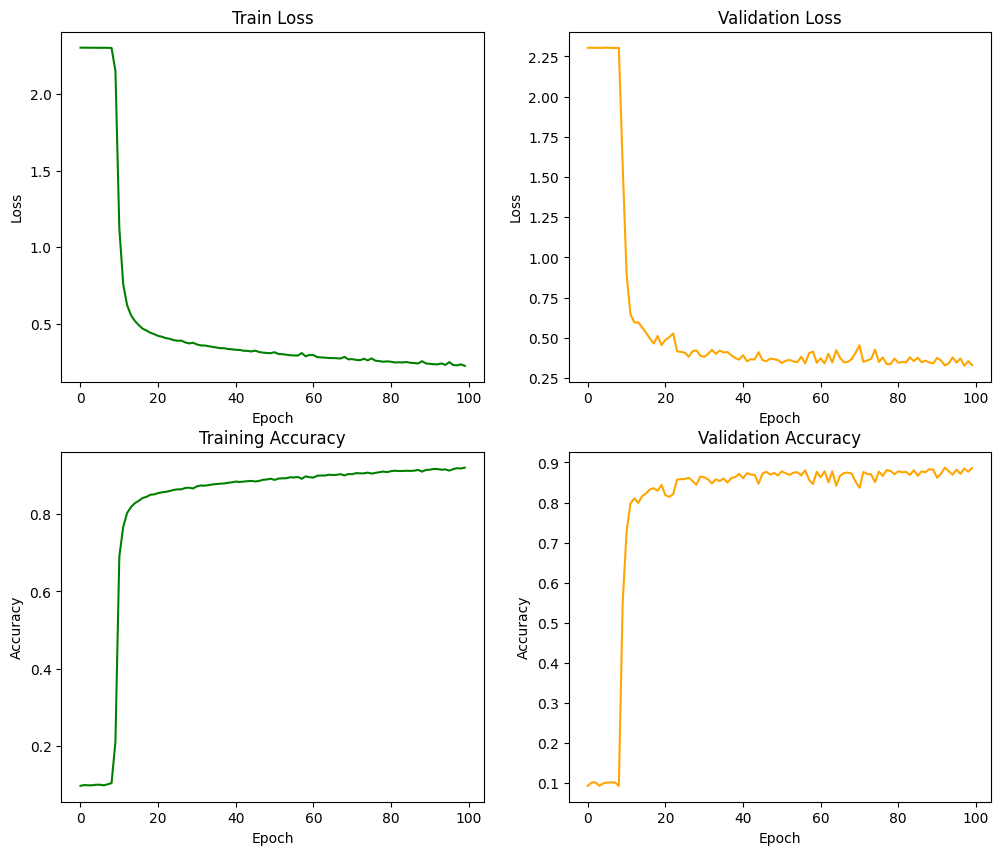

In [8]:
fig , ax = plt.subplots(2 , 2 , figsize =(12 , 10))
ax[0,0].plot(train_loss_lst , color ='green')
ax[0,0].set( xlabel ='Epoch', ylabel ='Loss')
ax[0,0].set_title('Train Loss')

ax[0,1].plot(val_loss_lst , color ='orange')
ax[0,1].set( xlabel ='Epoch', ylabel ='Loss')
ax[0,1].set_title('Validation Loss')

ax[1,0].plot(train_acc_lst , color ='green')
ax[1,0].set( xlabel ='Epoch', ylabel ='Accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_acc_lst , color ='orange')
ax[1,1].set( xlabel ='Epoch', ylabel ='Accuracy')
ax[1,1].set_title('Validation Accuracy')

plt.show()

In [9]:
test_target = []
test_predict = []
model.eval()
with torch.no_grad():
    for X_test , y_test in test_loader:
        X_test , y_test = X_test.to(device), y_test.to(device)
        outputs = model(X_test)

        test_predict.append(outputs.cpu())
        test_target.append(y_test.cpu())

    test_predict = torch.cat(test_predict)
    test_target = torch.cat(test_target)
    test_acc = (torch.argmax(test_predict, 1)==test_target).sum().item() / len(test_target)

    print('Evaluation on test set: ')
    print(f"Accuracy: {test_acc}")

Evaluation on test set: 
Accuracy: 0.8789


# **Train layers separately**

In [10]:
import random
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import FashionMNIST

In [11]:
device = torch.device('cuda :0' if torch.cuda.is_available() else 'cpu')

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

SEED = 42
set_seed(SEED)

In [12]:
#download Fashion MNIST.
train_dataset = FashionMNIST('./data', train = True, download=True, transform=transforms.ToTensor())
test_dataset = FashionMNIST('./data', train = False, download=True, transform=transforms.ToTensor())

In [13]:
#Split test and train dataset
batch_size = 64
train_ratio = 0.9
train_size = int(len(train_dataset)*train_ratio)
val_size = len(train_dataset) - train_size

train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_subset, batch_size = batch_size, shuffle=True)

val_loader = DataLoader(val_subset, batch_size = batch_size, shuffle=False)

test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle=False)

print(f"Train size:{len(train_subset)}")
print(f"Validation size:{len(val_subset)}")
print(f"Test size:{len(test_dataset)}")

Train size:54000
Validation size:6000
Test size:10000


In [26]:
class MLP_1layer(nn.Module):
    def __init__(self , input_dims, output_dims ):
        super (MLP_1layer , self).__init__()
        self.layer1 = nn.Linear(input_dims, output_dims)

        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.normal_(module.weight, mean=0.0, std= 0.05)
                nn.init.constant_(module.bias, 0.0)

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        return x


class MLP_2layers(nn.Module):
    def __init__(self , input_dims, output_dims ):
        super (MLP_2layers , self).__init__()
        self.layer1 = nn.Linear(input_dims, output_dims)
        self.layer2 = nn.Linear(output_dims, output_dims)

        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.normal_(module.weight, mean=0.0, std= 0.05)
                nn.init.constant_(module.bias, 0.0)

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Sigmoid()(x)
        return x


first = MLP_2layers( input_dims =784 , output_dims =128)
second = MLP_2layers( input_dims =128 , output_dims =128)
third = MLP_2layers ( input_dims =128 , output_dims =128)
fourth = MLP_1layer ( input_dims =128 , output_dims =128)

lr = 1e-2

for param in first.parameters():
    param.requires_grad = True
for param in first.parameters():
    param.requires_grad = True
for param in first.parameters():
    param.requires_grad = True

model = nn.Sequential(first, second, third, fourth, nn.Linear(128,10)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [27]:
#Model training

epochs = 100
train_loss_lst = []
train_acc_lst = []
val_loss_lst = []
val_acc_lst = []

for epoch in range(epochs):
    train_loss = 0.0
    train_acc = 0.0
    count = 0
    model.train()
    for X_train , y_train in train_loader:
        X_train , y_train = X_train.to(device), y_train.to(device)
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += (torch.argmax(outputs, 1)==y_train ).sum().item()
        count += len(y_train)

    train_loss /= len(train_loader)
    train_loss_lst.append(train_loss)
    train_acc /= count
    train_acc_lst.append(train_acc)

    val_loss = 0.0
    val_acc = 0.0
    count = 0
    model.eval()
    with torch.no_grad():
        for X_val , y_val in val_loader:
            X_val , y_val = X_val.to(device), y_val.to(device)
            outputs = model(X_val)
            loss = criterion(outputs, y_val)
            val_loss += loss.item()
            val_acc += (torch.argmax(outputs, 1)==y_val).sum().item()
            count += len(y_val)

    val_loss /= len(val_loader)
    val_loss_lst.append(val_loss)
    val_acc /= count
    val_acc_lst.append(val_acc)

    print(f"EPOCH {epoch+1}/{epochs}, Train_Loss:{train_loss:.4f}, Train_Acc:{train_acc:.4f}, Validation Loss: {val_loss:.4f}, Val_Acc:{val_acc:.4f}")


EPOCH 1/100, Train_Loss:2.3051, Train_Acc:0.0980, Validation Loss: 2.3029, Val_Acc:0.1022
EPOCH 2/100, Train_Loss:2.3037, Train_Acc:0.1008, Validation Loss: 2.3037, Val_Acc:0.1012
EPOCH 3/100, Train_Loss:2.3039, Train_Acc:0.1010, Validation Loss: 2.3033, Val_Acc:0.1018
EPOCH 4/100, Train_Loss:2.3040, Train_Acc:0.1009, Validation Loss: 2.3059, Val_Acc:0.1012
EPOCH 5/100, Train_Loss:2.3039, Train_Acc:0.0986, Validation Loss: 2.3026, Val_Acc:0.1000
EPOCH 6/100, Train_Loss:2.3039, Train_Acc:0.1016, Validation Loss: 2.3034, Val_Acc:0.0997
EPOCH 7/100, Train_Loss:2.3040, Train_Acc:0.0994, Validation Loss: 2.3062, Val_Acc:0.1022
EPOCH 8/100, Train_Loss:2.3039, Train_Acc:0.0983, Validation Loss: 2.3048, Val_Acc:0.0895
EPOCH 9/100, Train_Loss:2.3040, Train_Acc:0.0991, Validation Loss: 2.3033, Val_Acc:0.1003
EPOCH 10/100, Train_Loss:2.3041, Train_Acc:0.0971, Validation Loss: 2.3025, Val_Acc:0.1097
EPOCH 11/100, Train_Loss:2.3040, Train_Acc:0.0983, Validation Loss: 2.3041, Val_Acc:0.1022
EPOCH 12

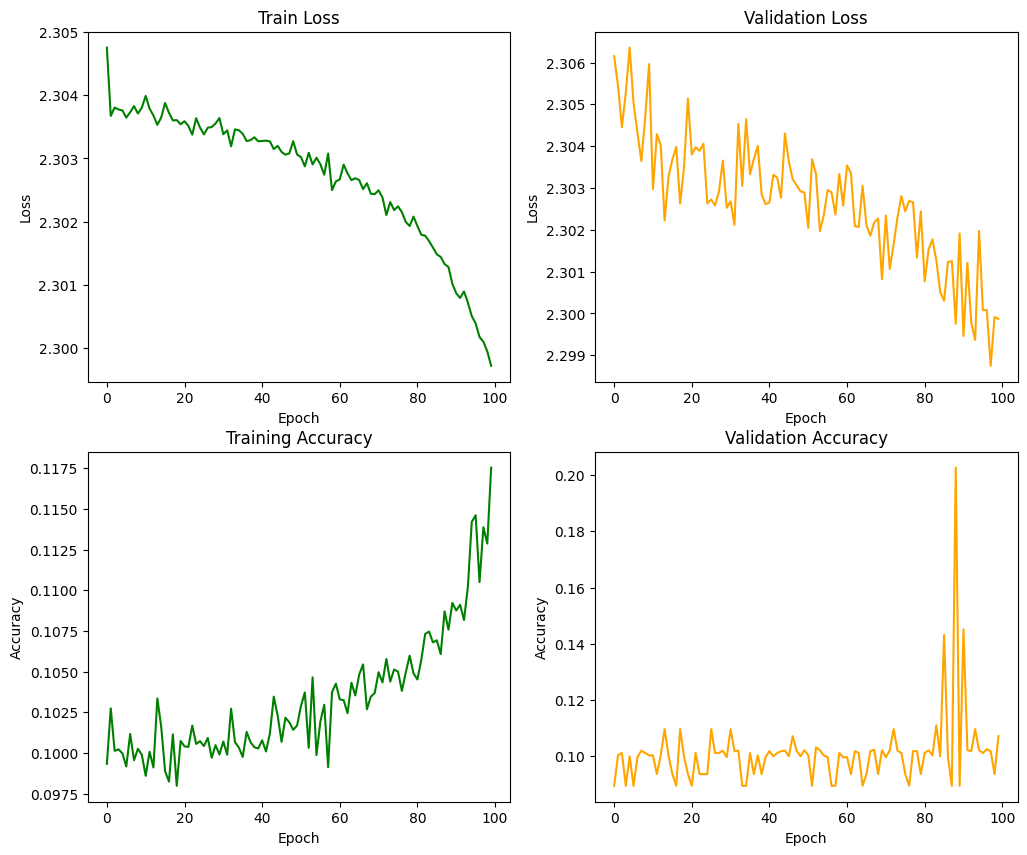

In [22]:
fig , ax = plt.subplots(2 , 2 , figsize =(12 , 10))
ax[0,0].plot(train_loss_lst , color ='green')
ax[0,0].set( xlabel ='Epoch', ylabel ='Loss')
ax[0,0].set_title('Train Loss')

ax[0,1].plot(val_loss_lst , color ='orange')
ax[0,1].set( xlabel ='Epoch', ylabel ='Loss')
ax[0,1].set_title('Validation Loss')

ax[1,0].plot(train_acc_lst , color ='green')
ax[1,0].set( xlabel ='Epoch', ylabel ='Accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_acc_lst , color ='orange')
ax[1,1].set( xlabel ='Epoch', ylabel ='Accuracy')
ax[1,1].set_title('Validation Accuracy')

plt.show()

In [23]:
test_target = []
test_predict = []
model.eval()
with torch.no_grad():
    for X_test , y_test in test_loader:
        X_test , y_test = X_test.to(device), y_test.to(device)
        outputs = model(X_test)

        test_predict.append(outputs.cpu())
        test_target.append(y_test.cpu())

    test_predict = torch.cat(test_predict)
    test_target = torch.cat(test_target)
    test_acc = (torch.argmax(test_predict, 1)==test_target).sum().item() / len(test_target)

    print('Evaluation on test set: ')
    print(f"Accuracy: {test_acc}")


Evaluation on test set: 
Accuracy: 0.1081


# **Gradient Normalization**

In [34]:
import random
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import FashionMNIST

In [35]:
device = torch.device('cuda :0' if torch.cuda.is_available() else 'cpu')

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

SEED = 42
set_seed(SEED)

In [36]:
#download Fashion MNIST.
train_dataset = FashionMNIST('./data', train = True, download=True, transform=transforms.ToTensor())
test_dataset = FashionMNIST('./data', train = False, download=True, transform=transforms.ToTensor())

In [37]:
#Split test and train dataset
batch_size = 64
train_ratio = 0.9
train_size = int(len(train_dataset)*train_ratio)
val_size = len(train_dataset) - train_size

train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_subset, batch_size = batch_size, shuffle=True)

val_loader = DataLoader(val_subset, batch_size = batch_size, shuffle=False)

test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle=False)

print(f"Train size:{len(train_subset)}")
print(f"Validation size:{len(val_subset)}")
print(f"Test size:{len(test_dataset)}")

Train size:54000
Validation size:6000
Test size:10000


In [40]:
class GradientNormalization(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        # Forward pass : pass input unchanged
        ctx.save_for_backward(input)
        return input

    @staticmethod
    def backward(ctx, grad_output):
        # Normalize the gradient
        mean = torch.mean(grad_output)
        std = torch.std(grad_output)
        grad_input = (grad_output - mean)/(std+1e-6)
        return grad_input

# Wrapper Module for GradientNormalization
class GradientNormalizationLayer(nn.Module):
    def __init__(self):
        super(GradientNormalizationLayer, self).__init__()

    def forward(self, x):
        return GradientNormalization.apply(x)


class MLP(nn.Module):
    def __init__(self , input_dims , hidden_dims , output_dims ):
        super (MLP , self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.layer6 = nn.Linear(hidden_dims, hidden_dims)
        self.layer7 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)
        self.norm = GradientNormalizationLayer()

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = self.norm(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = self.norm(x)
        x = nn.Sigmoid()(x)
        x = self.layer3(x)
        x = self.norm(x)
        x = nn.Sigmoid()(x)
        x = self.layer4(x)
        x = self.norm(x)
        x = nn.Sigmoid()(x)
        x = self.layer5(x)
        x = self.norm(x)
        x = nn.Sigmoid()(x)
        x = self.layer6(x)
        x = self.norm(x)
        x = nn.Sigmoid()(x)
        x = self.layer7(x)
        x = self.norm(x)
        x = nn.Sigmoid()(x)
        out = self.output(x)
        return out

input_dims = 784
hidden_dims = 128
output_dims = 10
lr = 1e-2

model = MLP(input_dims = input_dims, hidden_dims = hidden_dims, output_dims = output_dims).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [41]:
#Model training

epochs = 100
train_loss_lst = []
train_acc_lst = []
val_loss_lst = []
val_acc_lst = []

for epoch in range(epochs):
    train_loss = 0.0
    train_acc = 0.0
    count = 0
    model.train()
    for X_train , y_train in train_loader:
        X_train , y_train = X_train.to(device), y_train.to(device)
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += (torch.argmax(outputs, 1)==y_train ).sum().item()
        count += len(y_train)

    train_loss /= len(train_loader)
    train_loss_lst.append(train_loss)
    train_acc /= count
    train_acc_lst.append(train_acc)

    val_loss = 0.0
    val_acc = 0.0
    count = 0
    model.eval()
    with torch.no_grad():
        for X_val , y_val in val_loader:
            X_val , y_val = X_val.to(device), y_val.to(device)
            outputs = model(X_val)
            loss = criterion(outputs, y_val)
            val_loss += loss.item()
            val_acc += (torch.argmax(outputs, 1)==y_val).sum().item()
            count += len(y_val)

    val_loss /= len(val_loader)
    val_loss_lst.append(val_loss)
    val_acc /= count
    val_acc_lst.append(val_acc)

    print(f"EPOCH {epoch+1}/{epochs}, Train_Loss:{train_loss:.4f}, Train_Acc:{train_acc:.4f}, Validation Loss: {val_loss:.4f}, Val_Acc:{val_acc:.4f}")


EPOCH 1/100, Train_Loss:2.3061, Train_Acc:0.1006, Validation Loss: 2.3074, Val_Acc:0.0997
EPOCH 2/100, Train_Loss:2.3052, Train_Acc:0.0976, Validation Loss: 2.3024, Val_Acc:0.1003
EPOCH 3/100, Train_Loss:2.3050, Train_Acc:0.0989, Validation Loss: 2.3064, Val_Acc:0.1020
EPOCH 4/100, Train_Loss:2.3051, Train_Acc:0.1006, Validation Loss: 2.3041, Val_Acc:0.0937
EPOCH 5/100, Train_Loss:2.3047, Train_Acc:0.1017, Validation Loss: 2.3130, Val_Acc:0.0937
EPOCH 6/100, Train_Loss:2.3051, Train_Acc:0.1001, Validation Loss: 2.3059, Val_Acc:0.1020
EPOCH 7/100, Train_Loss:2.3051, Train_Acc:0.0987, Validation Loss: 2.3087, Val_Acc:0.1012
EPOCH 8/100, Train_Loss:2.3048, Train_Acc:0.1015, Validation Loss: 2.3059, Val_Acc:0.0895
EPOCH 9/100, Train_Loss:2.3048, Train_Acc:0.1020, Validation Loss: 2.3064, Val_Acc:0.1022
EPOCH 10/100, Train_Loss:2.3051, Train_Acc:0.1012, Validation Loss: 2.3051, Val_Acc:0.1022
EPOCH 11/100, Train_Loss:2.3054, Train_Acc:0.0983, Validation Loss: 2.3084, Val_Acc:0.0997
EPOCH 12

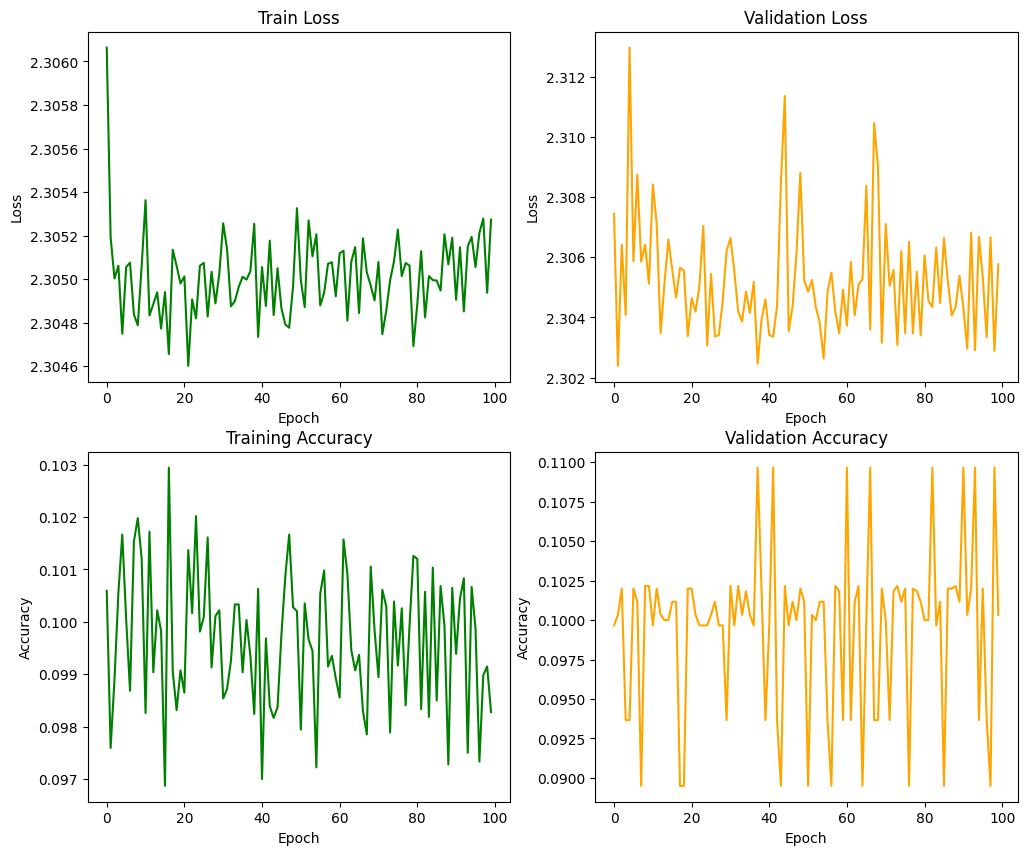

In [42]:
fig , ax = plt.subplots(2 , 2 , figsize =(12 , 10))
ax[0,0].plot(train_loss_lst , color ='green')
ax[0,0].set( xlabel ='Epoch', ylabel ='Loss')
ax[0,0].set_title('Train Loss')

ax[0,1].plot(val_loss_lst , color ='orange')
ax[0,1].set( xlabel ='Epoch', ylabel ='Loss')
ax[0,1].set_title('Validation Loss')

ax[1,0].plot(train_acc_lst , color ='green')
ax[1,0].set( xlabel ='Epoch', ylabel ='Accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_acc_lst , color ='orange')
ax[1,1].set( xlabel ='Epoch', ylabel ='Accuracy')
ax[1,1].set_title('Validation Accuracy')

plt.show()

In [43]:
test_target = []
test_predict = []
model.eval()
with torch.no_grad():
    for X_test , y_test in test_loader:
        X_test , y_test = X_test.to(device), y_test.to(device)
        outputs = model(X_test)

        test_predict.append(outputs.cpu())
        test_target.append(y_test.cpu())

    test_predict = torch.cat(test_predict)
    test_target = torch.cat(test_target)
    test_acc = (torch.argmax(test_predict, 1)==test_target).sum().item() / len(test_target)

    print('Evaluation on test set: ')
    print(f"Accuracy: {test_acc}")


Evaluation on test set: 
Accuracy: 0.1
